In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
batch_size = 128
nb_classes = 10 ## 10 digits from 0 to 9

#input image dimensions
img_rows = 28
img_cols = 28

# number of convolutional filters to use
nb_filters = 32

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test,y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('Xtrain shape:', X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

## Convert class vector to binary class matrices
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)
print("One hot encoding: {}".format(Y_train[0,:]))

('Xtrain shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')
One hot encoding: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


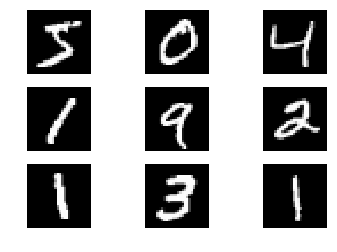

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,0],cmap="gray")
    plt.axis("off")

In [6]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6, 5, 5, input_shape=(1, img_rows, img_cols), border_mode='full'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='full'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))


ValueError: ('Invalid border mode:', 'full')